# First Example

This notebook is adapted from a [tutorial from the Pyevolve website](http://pyevolve.sourceforge.net/0_6rc1/getstarted.html#first-example)

To make the API easy to use, there are default parameters for almost every parameter in Pyevolve, for example, when you will use the [<tt>G1DList.G1DList</tt>](http://pyevolve.sourceforge.net/0_6rc1/module_g1dlist.html#G1DList.G1DList) genome without specifying the Mutator, Crossover and Initializator, you will use the default ones: Swap Mutator, One Point Crossover and the Integer Initialzator. All those default parameters are specified in the [<tt>Consts</tt>](http://pyevolve.sourceforge.net/0_6rc1/module_const.html#module-Consts) module (and you are highly encouraged to take a look at [source code, hosted at github](https://github.com/perone/Pyevolve)).

Let’s begin with the first simple example. First of all, you must know your problem, in this case, **our problem is to find a simple 1D list of integers of n-size with zero in all positions**. At the first look, we know by intuition that the representation needed to this problem is a 1D List, which you can found in Pyevolve by the name of [<tt>G1DList.G1DList</tt>](http://pyevolve.sourceforge.net/0_6rc1/module_g1dlist.html#G1DList.G1DList), which means Genome 1D List. This representation is based on a Python list as you will see, and is very easy to manipulate. 

In [1]:
from pyevolve import G1DList

The next step is to define the our [*evaluation function*](http://pyevolve.sourceforge.net/0_6rc1/intro.html#term-evaluation-function) to our Genetic Algorithm. We want all the $n$ list positions with value of ‘0’, so we can propose the evaluation function:

$$ f(x) = \sum^n_{i=0}(x[i]==0) \, ? \, 1 \, : \, 0 $$

In [2]:
# This function is the evaluation function, we want
# to give high score to more zero'ed chromosomes
def eval_func(chromosome):
    score = 0.0

    # iterate over the chromosome elements (items)
    for value in chromosome:
        if value==0:
            score += 1.0

    return score

As you can see in the above equation, with the $x$ variable representing our genome list of integers, the $f(x)$ shows our evaluation function, which is the sum of ‘0’ values in the list. For example, if we have a list with 10 elements like this:

In [3]:
x = [1, 2, 3, 8, 0, 2, 0, 4, 1, 0]

we will got the raw score value of 3, or $f(x)$ = 3.

In [4]:
eval_func(x)

3.0

It is important to note that in Pyevolve, we have [*raw score*](http://pyevolve.sourceforge.net/intro.html#term-raw-score) and [*fitness score*](http://pyevolve.sourceforge.net/intro.html#term-fitness-score), the raw score is the return of the evaluation function and the fitness score is the scaled score.

The next step is the creation of one [sample genome](http://pyevolve.sourceforge.net/0_6rc1/intro.html#term-sample-genome) for the Genetic Algorithm. We can define our genome as this:

In [5]:
# Genome instance
genome = G1DList.G1DList(20)

# The evaluator function (objective function)
genome.evaluator.set(eval_func)

This will create an instance of the [G1DList.G1DList](http://pyevolve.sourceforge.net/0_6rc1/module_g1dlist.html#G1DList.G1DList) class (which resides in the [G1DList](http://pyevolve.sourceforge.net/0_6rc1/module_g1dlist.html#module-G1DList) module) with the list $n$-size of 20 and sets the evaluation function of the genome to the evaluation function “**eval_func**” that we have created before.

But wait, where is the range of integers that will be used in the list? Where is the mutator, crossover and initialization functions? They are all in the default parameters, as you see, this parameters keep things simple.

By default (and you have the **documentation** to find this defaults), the range of the integers in the [G1DList.G1DList](http://pyevolve.sourceforge.net/0_6rc1/module_g1dlist.html#G1DList.G1DList) is between the inverval [ [Consts.CDefRangeMin](http://pyevolve.sourceforge.net/0_6rc1/module_const.html#Consts.CDefRangeMin), [Consts.CDefRangeMax](http://pyevolve.sourceforge.net/0_6rc1/module_const.html#Consts.CDefRangeMax)] inclusive, and genetic operators is the same I have cited before: Swap Mutator [Mutators.G1DListMutatorSwap()](http://pyevolve.sourceforge.net/0_6rc1/module_mutators.html#Mutators.G1DListMutatorSwap), One Point Crossover [Crossovers.G1DListCrossoverSinglePoint()](http://pyevolve.sourceforge.net/0_6rc1/module_crossovers.html#Crossovers.G1DListCrossoverSinglePoint) and the Integer Initializator [Initializators.G1DListInitializatorInteger()](http://pyevolve.sourceforge.net/0_6rc1/module_initializators.html#Initializators.G1DListInitializatorInteger). 

In [6]:
from pyevolve import Consts
Consts.CDefRangeMin, Consts.CDefRangeMax

(0, 100)

You can change everything with the API, for example, you can pass the ranges to the genome, like this:

In [7]:
genome.setParams(rangemin=0, rangemax=10)

Right, now we have our evaluation function and our first genome ready, the next step is to create our Genetic Algorithm Engine, the GA Core which will do the evolution, control statistics, etc... The GA Engine which we will use is the [GSimpleGA.GSimpleGA](http://pyevolve.sourceforge.net/0_6rc1/module_gsimplega.html#GSimpleGA.GSimpleGA) which resides in the [GSimpleGA](http://pyevolve.sourceforge.net/0_6rc1/module_gsimplega.html#module-GSimpleGA) module, this GA Engine is the [genetic algorithm described by Goldberg](http://pyevolve.sourceforge.net/0_6rc1/getstarted.html#ganote). So, let’s create the engine:

In [8]:
from pyevolve import GSimpleGA
ga = GSimpleGA.GSimpleGA(genome)

Ready! Simple, isn't it? We simple create our GA Engine with the created genome. You can ask: “Where is the selector method? The number of generations? Mutation rate?“. Again: we have defaults. By default, the GA will evolve for 100 generations with a population size of 80 individuals, it will use the mutation rate of 2% and a crossover rate of 80%, the default selector is the Ranking Selection ([Selectors.GRankSelector()](http://pyevolve.sourceforge.net/0_6rc1/module_selectors.html#Selectors.GRankSelector)) method. Those default parameters was not random picked, they are all based on the commom used properties.

We need to import the [Interaction module](http://pyevolve.sourceforge.net/0_6rc1/module_interaction.html), which includes some plot functions. We will plot the score of all the individuals of the population after each generation.

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyevolve.Interaction as it

Now, all we need to do is to evolve! For didactic purposes, we are setting evolution steps of only one generation. In real problems, you are likely to increase this number. 

For the first call we use the [evolve function](http://pyevolve.sourceforge.net/0_6rc1/module_gsimplega.html#GSimpleGA.GSimpleGA.evolve). The plot represents the score of each individual.

**WARNING: run the following cell ONLY ONCE with Shift+Enter.**

Generation: 1


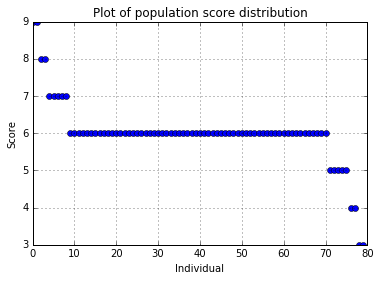

In [10]:
ga.setGenerations(1)
ga.evolve()
print("Generation: %d" % ga.currentGeneration)
population = ga.getPopulation()
it.plotPopScore(population)

From the second generation on, we use the [step function](http://pyevolve.sourceforge.net/0_6rc1/module_gsimplega.html#GSimpleGA.GSimpleGA.step). We will display the best individual and its score, and plot the scores of the population, for each individual, and the histogram.

**You may repeat the cell below many times by pressing Ctrl+Enter.**

Generation: 3
Best individual: [6, 0, 8, 9, 0, 5, 0, 0, 0, 7, 0, 3, 0, 0, 2, 8, 0, 10, 0, 3]
Best score: 10


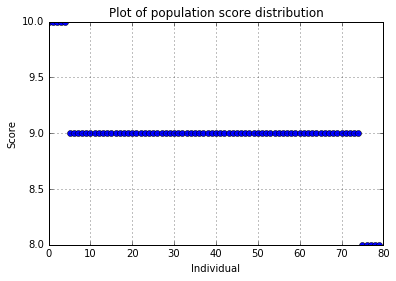

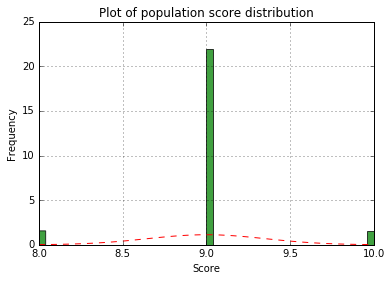

In [12]:
ga.step()
print("Generation: %d" % ga.currentGeneration)
best = ga.bestIndividual()
print('Best individual: %s' % str(best.genomeList))
print('Best score: %.0f' % best.score)
population = ga.getPopulation()
it.plotPopScore(population)
it.plotHistPopScore(population)

Ready, now we have our first Genetic Algorithm, it looks more like a “Hello GA!” application. The code above shows the call of the [GSimpleGA.GSimpleGA.bestIndividual()](http://pyevolve.sourceforge.net/0_6rc1/module_gsimplega.html#GSimpleGA.GSimpleGA.bestIndividual) method, which returns the best individual after each generation step, and with the print Python command, we show the genome on the screen.

As you can see, the population have obtained the best raw score (20.00) approximately between the generations 16-18.